# Final Project - Countries categorization
A Jupyter notebook showing a Deep Learning problem description, EDA procedure, analysis (model building and training), result, and discussion/conclusion. 

## Problem
The problem to solve is to suggest the countries that are in the direct need of aid for the CEO of HELP International. The job is to categorize the countries using some socio-economic and health factors that determine the overall development of the country. For this problem, I will use 4 unsupervised learning methods such as K-means, Agglomerative, Bisecting K-Means and DBSCAN.

### Dataset
The dataset comes from Kaggle (https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data).
There are 167 rows and 10 columns.
1. country: Name of the country
2. child_mort: Death of children under 5 years of age per 1000 live births
3. exports: Exports of goods and services per capita. Given as %age of the GDP per capita
4. health: Total health spending per capita. Given as %age of GDP per capita
5. imports: Imports of goods and services per capita. Given as %age of the GDP per capita
6. income: Net income per person
7. inflation: The measurement of the annual growth rate of the Total GDP
8. life_expec: The average number of years a new born child would live if the current mortality patterns are to remain the same
9. total_fer: The number of children that would be born to each woman if the current age-fertility rates remain the same.
10. gdp: The GDP per capita. Calculated as the Total GDP divided by the total population.

### Load libraries

In [1]:
# Basic libraries
import pandas as pd
import numpy as np
import math
import statistics
import time
from collections import Counter

# Plots
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Data processing, metrics and modeling
from sklearn.cluster import KMeans, AgglomerativeClustering, BisectingKMeans, DBSCAN
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import Birch
from sklearn.metrics import silhouette_score as sil_score
import scipy.cluster.hierarchy as sch

# Supress warning
import warnings
warnings.filterwarnings('ignore')

## 1. Exploratory Data Analysis (EDA) — Inspect, Visualize and Clean the Data

### 1.1. Data import and basic inspection
Importing the data from the Country-data CSV file and inspecting its content.

In [2]:
# Read the data
data_ini = pd.read_csv('./data/Country-data.csv')
display(data_ini.info(),data_ini.head(),data_ini.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


None

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


### 1.2. Inspect null
Identifying if there is null values on the features.

In [3]:
# Checking for null values
data_ini.isnull().any()

country       False
child_mort    False
exports       False
health        False
imports       False
income        False
inflation     False
life_expec    False
total_fer     False
gdpp          False
dtype: bool

### 1.3. Dropping columns
Dropping the country column because it is not needed for the modeling.

In [4]:
data = data_ini.drop(columns = 'country')

In [5]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


### 1.4. Correlation matrix
Correlation matrix will help me to see the correlation between all the possible pairs of values for this dataset.

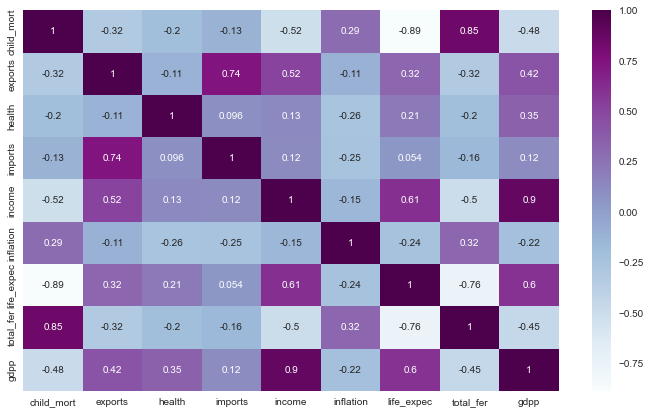

In [6]:
plt.figure(figsize = (12, 7))
sns.heatmap(data.corr(), annot = True, cmap="BuPu")
#plt.savefig('seismic',dpi=1000)
plt.show()

From the correlation matrix, I can observe that income and gdp have the highest correlation followed by child_mort and total_fer. Whereas, child_mort and life_expec have the lowest correlation.

### 1.5. Pairplot
Pairplot is used to plot the pairwise relationships in the dataset.

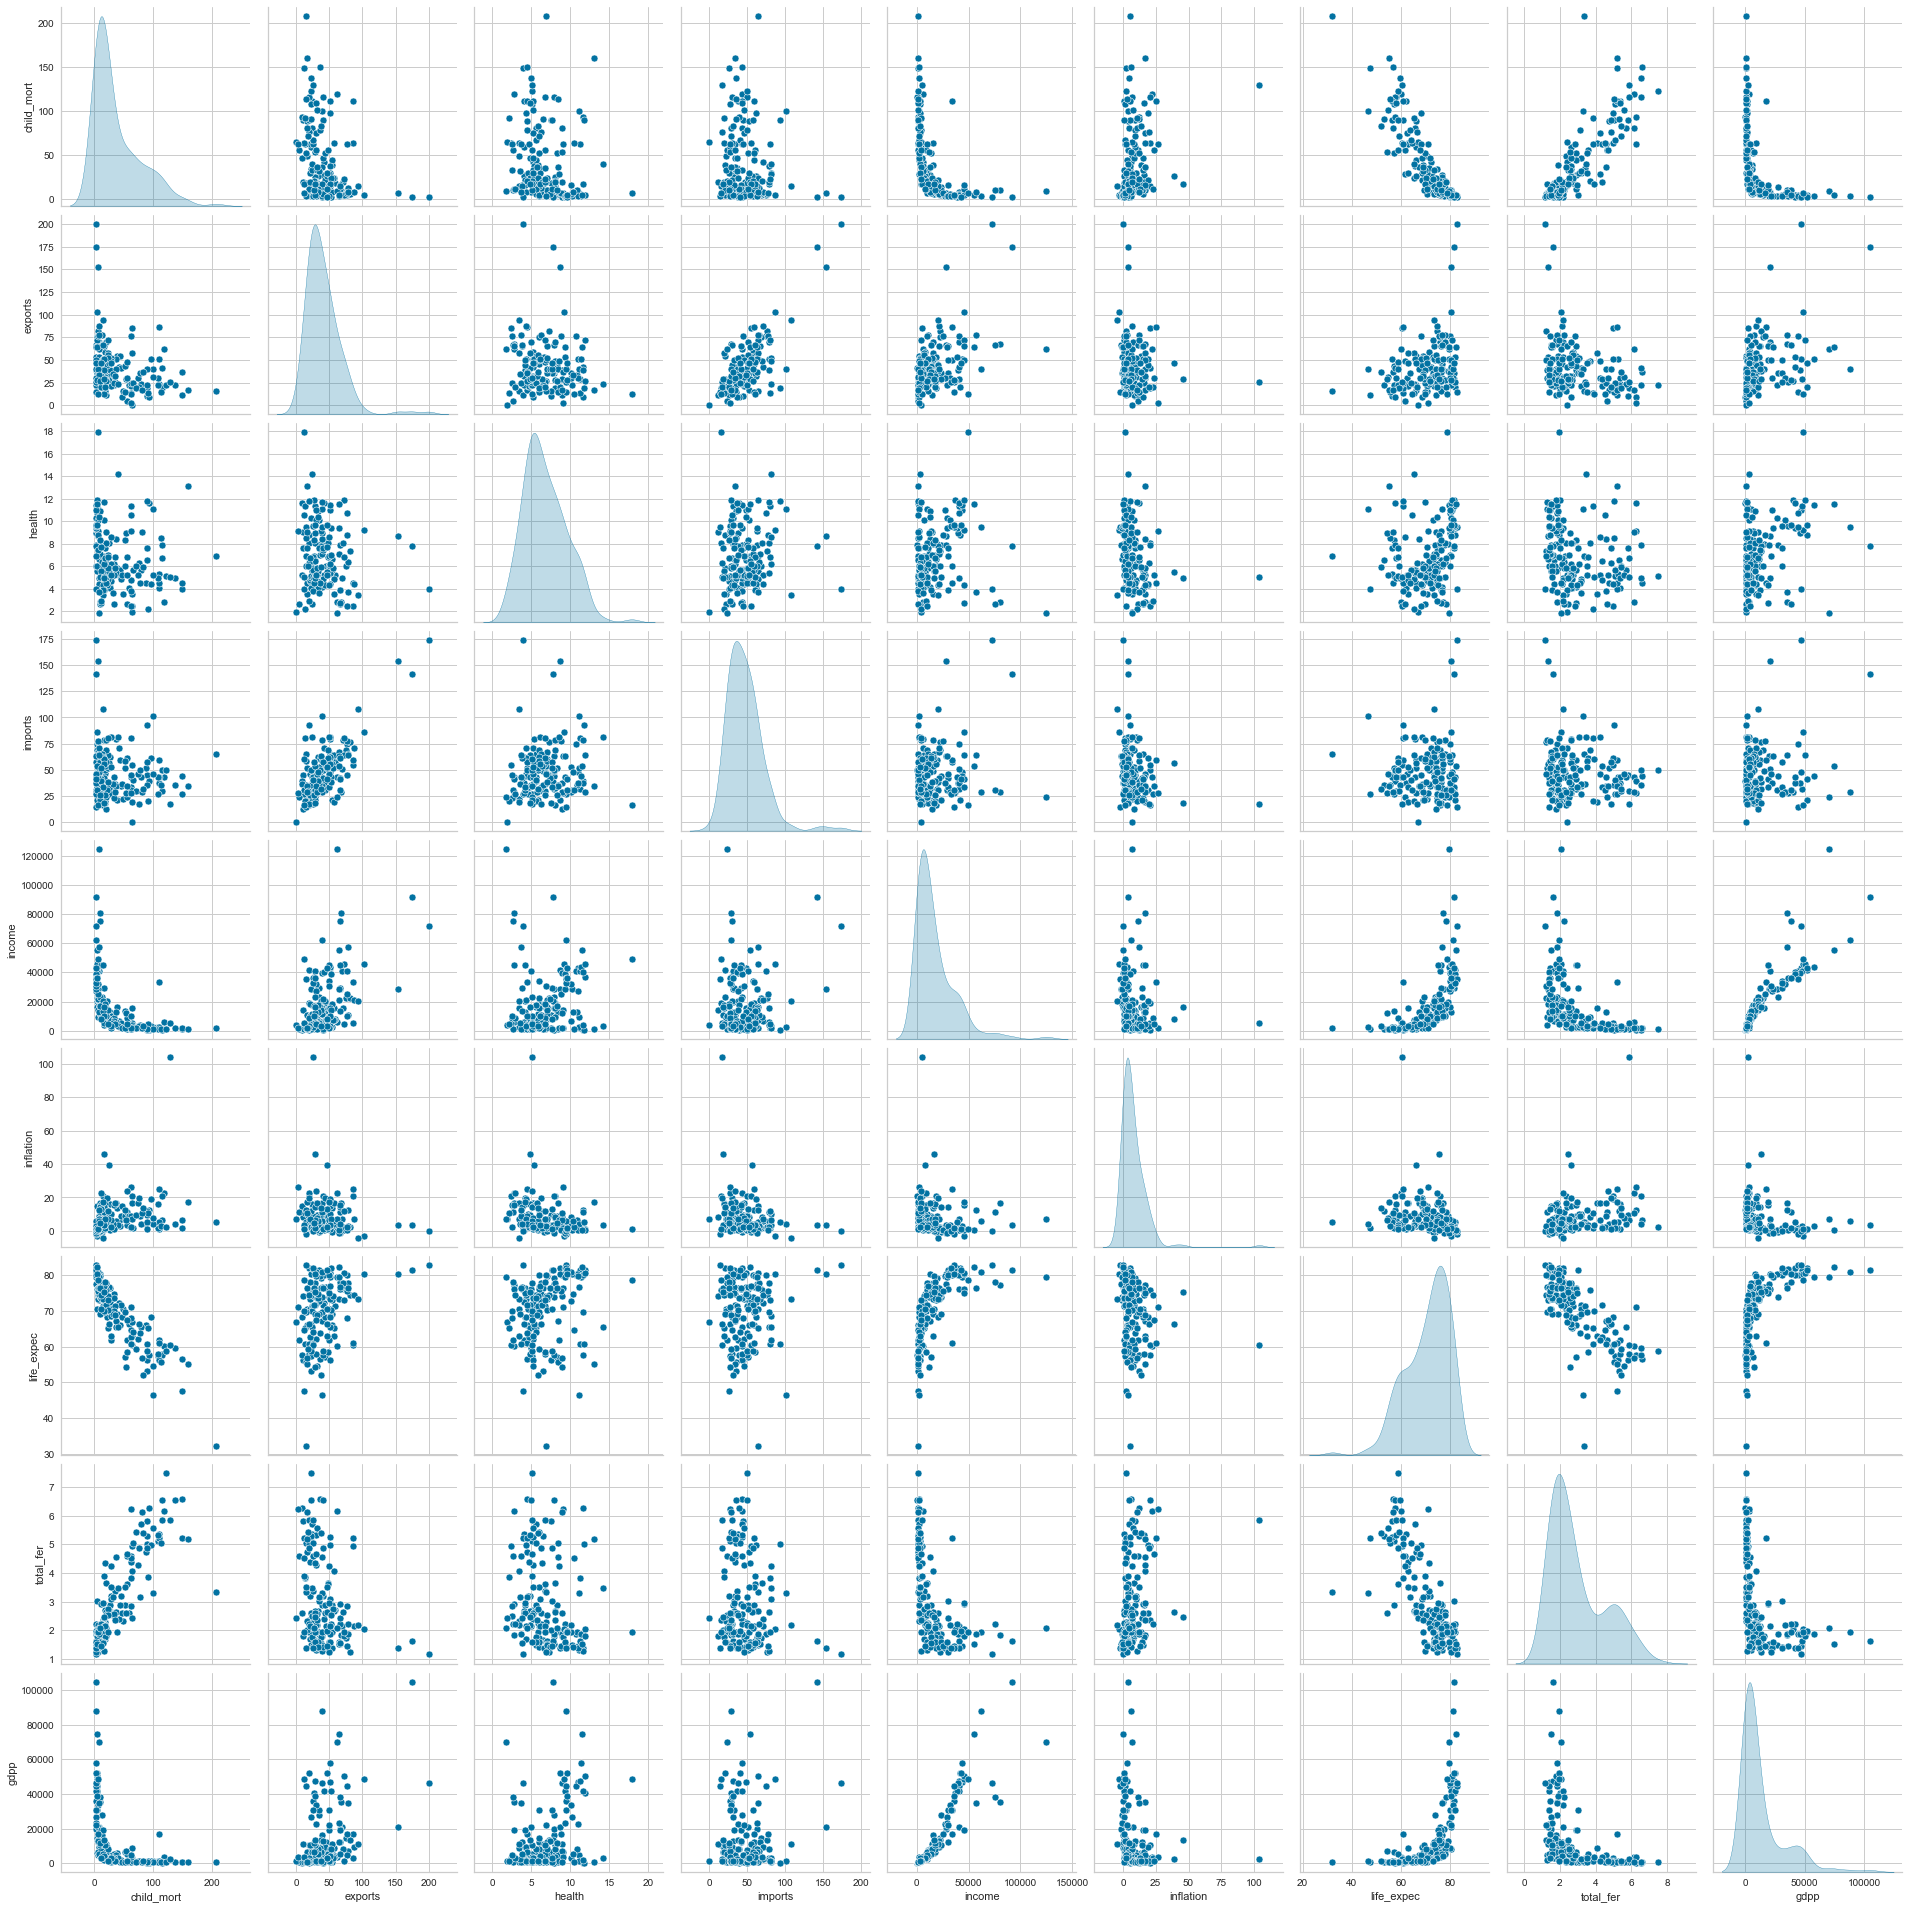

In [25]:
pp = sns.pairplot(data,diag_kind='kde',height=3)
#pp.fig.set_size_inches(10,10)

From the histogram, I can observe that most of the data is right skewed except for life expectaincy. There are two peaks in GDP and total fertility.
From the scatter plot, income and GDP seems to have high correlation. All Countries with higher GDPP have low child mortality and high life expectancy and lower inflation. Also, all countries with higher income have lower child mortality

## 2. Model building, training and result
### 2.1. Standardization
To put different features on the same scale, data standardization is going to be applied to bring data into a uniform format. Thus, it will allow to compare scores between different types of variables.

In [8]:
scale = StandardScaler()
sData = pd.DataFrame(scale.fit_transform(data), columns = data.columns) # Scaled Data
sData.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,-3.722904e-17,1.003008,-0.887138,-0.746619,-0.471798,0.592667,4.221297
exports,167.0,2.127373e-16,1.003008,-1.500192,-0.633337,-0.223528,0.374720,5.813835
health,167.0,5.504579e-16,1.003008,-1.827827,-0.692211,-0.181001,0.651541,4.047436
imports,167.0,2.765585e-16,1.003008,-1.939940,-0.691479,-0.148743,0.491353,5.266181
income,167.0,-7.977650e-17,1.003008,-0.860326,-0.717456,-0.373808,0.294237,5.611542
inflation,167.0,-1.063687e-17,1.003008,-1.137852,-0.566641,-0.226950,0.281636,9.129718
life_expec,167.0,3.696311e-16,1.003008,-4.337186,-0.592758,0.286958,0.704258,1.380962
total_fer,167.0,3.044803e-16,1.003008,-1.191250,-0.763902,-0.356431,0.617525,3.009349
gdpp,167.0,5.850277e-17,1.003008,-0.696801,-0.636660,-0.454431,0.059421,5.036507


### 2.2. Finding optimal number of clusters
To find optimal number of clusters, elbow and silhouette methods are used.

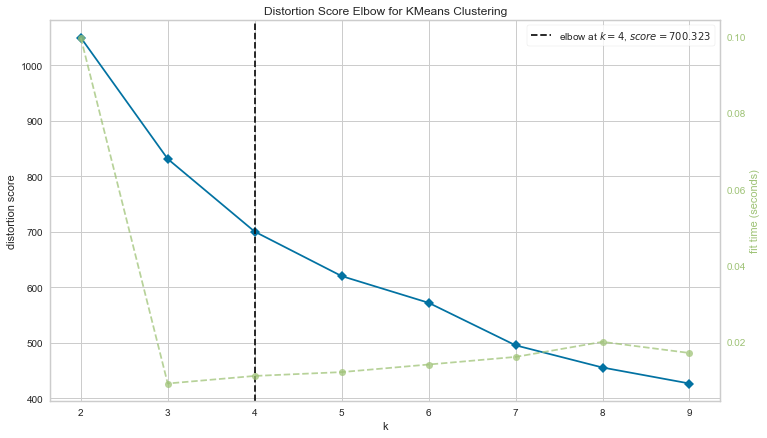

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [9]:
plt.figure(figsize = (12, 7))
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,10))
 
visualizer.fit(sData)
visualizer.show()

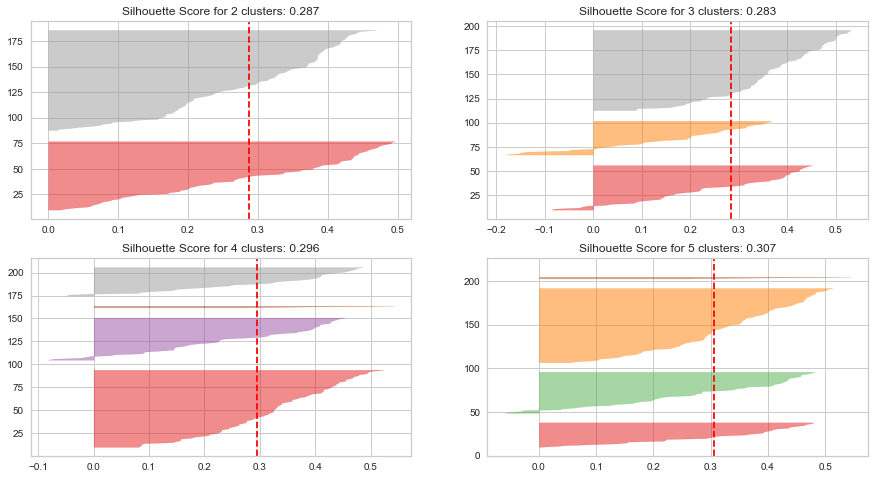

In [10]:
# Silhouette Scores on Scaled Data
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (15,8))
ax = [ax1, ax2, ax3, ax4]

for i in range(2,6):
    modelKM = KMeans(n_clusters = i)
    silViz = SilhouetteVisualizer(modelKM, ax=ax[i-2])
    silViz.fit(sData)
    txtx = 'Silhouette Score for ' + str(i) + ' clusters: '+ str(round(sil_score(sData, modelKM.labels_), 3))
    ax[i-2].set_title(txtx)

### 2.3. K-means
K-Means performs the division of objects into clusters that share similarities and are dissimilar to the objects belonging to another cluster. I will use 4 cluster of numbers according to the silhouette and elbow method used above to find the optimal number of cluster.

In [11]:
modelKM = KMeans(n_clusters = 4)
modelKM.fit(sData)
sPredKM = pd.Series(modelKM.labels_)
modelKM.labels_

array([1, 0, 0, 1, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0,
       0, 2, 0, 1, 1, 0, 1, 3, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 3, 0,
       3, 0, 0, 0, 0, 1, 1, 0, 0, 3, 3, 1, 1, 0, 3, 1, 3, 0, 0, 1, 1, 0,
       1, 0, 3, 0, 0, 0, 1, 2, 3, 3, 0, 3, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       3, 3, 1, 1, 3, 0, 1, 0, 0, 0, 0, 0, 3, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 2, 0, 3, 0, 1, 0, 3, 0, 0, 1, 0, 3, 3, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 3, 3, 0, 0, 0, 0, 0, 1, 1])

### 2.4. Agglomerative
Agglomerative Clustering algorithm is used to group objects in clusters based on their similarity. By doing a dendrogram analysis, I can see how it can give me an indication of the number of clusters in the dataset. To find the number of clusters in the dendogram, I will trace a line with the largest horizontal space that doesn't have any vertical lines. This means that there's more separation between the clusters.

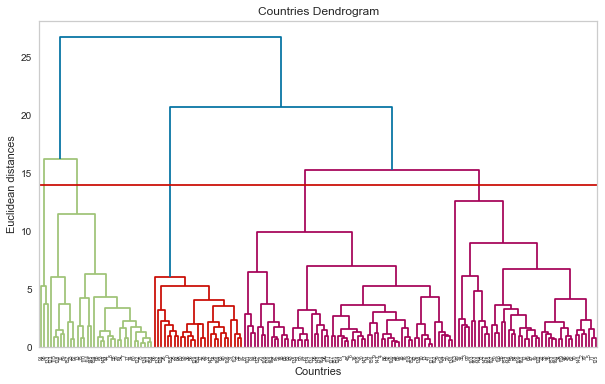

In [12]:
plt.figure(figsize=(10,6)) 
plt.title('Countries Dendrogram')
plt.xlabel('Countries')
plt.ylabel('Euclidean distances')
plt.grid(None)
dendro = sch.dendrogram(sch.linkage(sData, method='ward'))
plt.axhline(y = 14, color = 'r', linestyle = '-')

After locating the horizontal line, I count how many times the vertical lines were crossed by it. So, 4 seems to be a good indicator of the number of clusters with it is the same than the elbow and silhouette methods performed steps above.

In [13]:
modelAgg = AgglomerativeClustering(n_clusters=4, linkage='ward',affinity='euclidean')
modelAgg.fit_predict(sData)
sPredAgg = pd.Series(modelAgg.labels_)
modelAgg.labels_

array([2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 0, 1, 0, 1, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 3, 0, 2, 2, 0, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       1, 1, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 1, 2, 0, 0,
       2, 3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 2, 0, 0, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2], dtype=int64)

### 2.5. Bisecting K-Means
Bisecting K-Means Algorithm is a modification of the K-Means algorithm. It can produce partitional/hierarchical clustering. It can recognize clusters of any shape and size. 

In [14]:
modelBisectKM = BisectingKMeans(n_clusters=4, random_state=0)
modelBisectKM.fit(sData)
sPredBisectKM = pd.Series(modelBisectKM.labels_)
modelBisectKM.labels_

array([3, 0, 0, 3, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 1, 0, 3, 0, 2, 0, 2,
       0, 1, 0, 3, 3, 2, 3, 1, 0, 3, 3, 0, 0, 0, 2, 3, 2, 0, 3, 0, 0, 0,
       1, 0, 0, 2, 0, 3, 2, 0, 2, 1, 1, 2, 3, 0, 1, 2, 0, 0, 2, 3, 3, 2,
       3, 0, 1, 2, 2, 0, 2, 1, 0, 1, 0, 1, 0, 2, 2, 2, 1, 2, 2, 0, 0, 3,
       3, 0, 0, 1, 0, 2, 3, 0, 0, 3, 1, 2, 0, 2, 0, 2, 0, 0, 3, 2, 2, 2,
       1, 1, 3, 3, 1, 0, 2, 0, 0, 0, 2, 0, 0, 1, 0, 0, 2, 2, 0, 2, 0, 0,
       3, 1, 0, 1, 2, 2, 0, 1, 2, 0, 2, 0, 1, 1, 2, 3, 0, 3, 3, 2, 0, 0,
       2, 3, 0, 1, 1, 1, 0, 2, 2, 2, 0, 2, 3])

### 2.6. DBSCAN (Density-based spatial clustering of applications with noise)
DBSCAN algorithm divides data points into specific groups, such that data points in a group have similar properties than those in other groups. 

In [15]:
modelDBSCAN = DBSCAN(eps = 1.3, min_samples = 8)
modelDBSCAN.fit(sData)
sPredDBSCAN = pd.Series(modelDBSCAN.labels_)
modelDBSCAN.labels_

array([ 2,  0,  0, -1,  0,  0,  0,  1,  1,  0,  0, -1,  0,  0, -1, -1,  0,
        2,  0,  0,  0, -1,  0, -1,  0,  2, -1,  0,  2,  1,  0, -1, -1,  0,
        0,  0,  2, -1, -1,  0,  2,  0,  0,  0,  1,  0,  0,  0,  0, -1,  2,
        0,  0,  1,  1, -1,  2,  0,  1,  2,  1,  0,  0,  2,  2,  0, -1,  0,
        1,  0,  0,  0, -1, -1,  1,  1,  0,  1, -1,  0,  2, -1, -1,  0,  0,
        0,  0, -1, -1, -1,  0, -1,  0,  2,  2,  0,  0,  2, -1, -1,  0, -1,
       -1, -1,  0,  0,  2, -1,  0,  0,  1,  1, -1, -1, -1, -1, -1,  0,  0,
        0,  0,  0,  1, -1,  0,  0, -1,  0, -1,  2,  0, -1, -1, -1,  0,  0,
       -1, -1,  0,  1,  0,  0, -1,  0,  1, -1, -1,  2,  0, -1, -1,  0,  0,
        0, -1,  2,  0, -1,  1, -1,  0,  0,  0, -1, -1, -1,  2],
      dtype=int64)

### 2.7. Selecting the best clustering method

In [16]:
print('Silhouette Score for K-Mean:', '%.2f'%sil_score(sData, sPredKM))
print('Silhouette Score for Agglomerative:', '%.2f'%sil_score(sData, sPredAgg))
print('Silhouette Score for Bisecting K-Means:', '%.2f'%sil_score(sData, sPredBisectKM))
print('Silhouette Score for DBSCAN:', '%.2f'%sil_score(sData, sPredDBSCAN))

Silhouette Score for K-Mean: 0.29
Silhouette Score for Agglomerative: 0.25
Silhouette Score for Bisecting K-Means: 0.19
Silhouette Score for DBSCAN: 0.13


The better silhouette score is for K-Mean algorith. Thus, we are going to use this algorithm to classify the countries.

### 2.8. Results 
After the data has been classified, I will create a dataframe based on the prediction data from K-Mean algorithm. Then, I will plot the result in a map.

In [17]:
#Add the predicted data into a new dataframe
dataKM = data_ini.copy()
dataKM['Cluster'] = sPredKM
dataKM

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1


In [18]:
# Set the categories per group
p = dataKM.Cluster.value_counts()

dataKM.Cluster[dataKM.Cluster == p.index[0]] = 22
dataKM.Cluster[dataKM.Cluster == p.index[1]] = 11
dataKM.Cluster[dataKM.Cluster == p.index[2]] = 33
dataKM.Cluster[dataKM.Cluster == p.index[3]] = 44
dataKM.Cluster.replace({22:2, 11:1, 33:3, 44:4 }, inplace = True)
dataKM

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,2
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,2
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,2
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1


In [19]:
#Set label to the predicted data
cat = {1: 'Undeveloped', 2: 'Developing', 3: 'Developed', 4: 'Well Developed'}
dataKM.Cluster.replace(cat, inplace = True)
dataKM

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,Undeveloped
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,Developing
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,Developing
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,Undeveloped
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,Developing
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,Developing
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,Developing
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,Developing
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,Undeveloped


In [24]:
fig = px.choropleth(dataKM,
                    locationmode='country names',
                    locations='country',
                    color='Cluster',
                    color_discrete_map = {'Undeveloped':'#DB1C18', 'Developing':'#EBB331',
                                  'Developed':'#67E232', 'Well Developed':'#51A2DB'} ,
                    title='Coutries by categories'
                   )
fig.update_layout(legend=dict(yanchor="top", y=0.5, xanchor="left", x=-0.1))
fig.show()

Most of the Underdeveloped countries seems to be in African Continent.

In [21]:
fig1 = px.choropleth(data_frame = dataKM, locationmode = 'country names', locations = 'country', 
             color = dataKM.Cluster, title = 'Countries in African continent',
             color_discrete_map = {'Undeveloped':'#DB1C18', 'Developing':'#EBB331',
                                  'Developed':'#67E232', 'Well Developed':'#51A2DB'},
             projection='equirectangular', scope = 'africa')
fig1.update_layout(legend=dict(yanchor="top", y=0.5, xanchor="left", x=-0.1))

Some of the Undeveloped countries seem to be in Asian Continent

In [22]:
fig2 = px.choropleth(data_frame = dataKM, locationmode = 'country names', locations = 'country', 
             color = dataKM.Cluster, title = 'Countries in African continent',
             color_discrete_map = {'Undeveloped':'#DB1C18', 'Developing':'#EBB331',
                                  'Developed':'#67E232', 'Well Developed':'#51A2DB'},
             scope = 'asia')
fig2.update_layout(legend=dict(yanchor="top", y=0.5, xanchor="left", x=-0.1))

List of undeveloped countries

In [23]:
focusData = dataKM[dataKM.Cluster == 'Undeveloped']
focusData['country']

0                   Afghanistan
3                        Angola
17                        Benin
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
72                         Iraq
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106                  Mozambique
108     

## 3. Conclusion
I can conclude that the countries will need aid are in the African Continent and some in the Asian Continent. To get this result, I used K-Means, Agglomerative, Bisecting K-Means and DBSCAN algorithms. But before performing these algorithms, I used the Elbow and Silhouette methods to find the optimal number of clusters. The Elbow method consists of plotting the explained variation as a function of the number of clusters and picking the elbow of the curve as the number of clusters to use. The Silhouette method provides a succinct graphical representation of how well each object has been classified. Both methods were used because they provide valuable information for clustering analysis. For this data, the cluster number were the same on both methods. Then, I selected the best cluster method by using the Silhouette score. K-Means was the one that got the highest score. Therefore, I use the predicted data from K-Means algorithm to get the list of countries that will need aid. 